In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
import os

In [2]:
def RandomGraphGenerator(n, p):
    '''
    Generates a random graph of n vertices using Erdös–Rényi model
    
    Input
    -----
    n  : int
         number of vertices
    p  : float
         probability that an edge exists between a given pair of vertices

    Output
    ------
    graph  :  networkx graph
              random graph created
    '''
    
    #Vertex set and edge set
    V = set([v for v in range(1, n+1)])
    E = set()
    
    #Possible edges
    for combination in combinations(V, 2):
        
        a = random()  #a in [0, 1)
        if a < p:
            E.add(combination)
            
    graph = nx.Graph()
    graph.add_nodes_from(V)
    graph.add_edges_from(E)
    
    return graph

In [3]:
n = 10
p = 0.8
G = RandomGraphGenerator(n, p)

In [4]:
def DrawNetwork(network, figName):
    '''
    Plots a networkx graph and saves it as a png file
    
    Input
    -----
    network   : networkx graph
                graph to be plotted
    figName   : string
                name of the png file
    '''
    
    pos = nx.spring_layout(network)
    nx.draw_networkx(network, pos)
    plt.savefig(figName)
    plt.show()

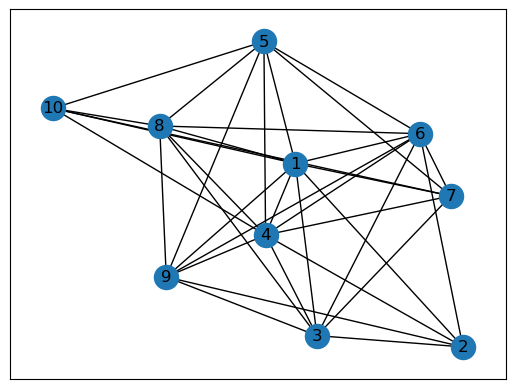

In [5]:
DrawNetwork(G, "graph.png")

In [6]:
def NetworkToFile(network, fileName):
    '''
    Saves the networkx graph in a file
    
    Input
    -----
    network   : networkx graph
                graph to be saved in the file
    fileName  : string
                name of the file
    '''
    #Preparing data for the text file
    n = 0
    m = 0
    vertex = []
    
    n = len(network.nodes)
    m = len(network.edges)
    
    for i in range(n):
        vertex.append([])
    
    for e in network.edges:
        vertex[e[0]-1].append(e[1])
        vertex[e[1]-1].append(e[0])
    
    #Writing in the file
    with open(fileName, "w") as file:
        file.write("%%%%%% graph file %%%%%%")
        file.write("\n")
        file.write(str(n) + " " + str(m))
        file.write("\n")
        
        for i in range(len(vertex)):
            for j in range(len(vertex[i])):
                file.write(str(vertex[i][j]) + " ")
            file.write("\n")

In [7]:
NetworkToFile(G, "graph.txt")

In [8]:
def FileToNetwork(fileName):
    '''
    Saves the information of a file as a networkx graph
    
    Input
    -----
    fileName  : string
                name of the file
    
    Output
    ------
    network   : networkx graph
                graph created
    '''
    
    network = nx.Graph()
    vertex = []
    
    #Reading file
    with open(fileName) as file:
        
        next(file) #discard line
        n, m = [int(x) for x in next(file).split()]
        
        for i in range(n):
            vertex.append([])
            
        i = 0   
        for line in file:
            e = line.split()
            for j in range(len(e)):
                vertex[i].append(int(e[j]))
            i += 1
        
        #Edge list
        edge = []
        aux = []
        for i in range(len(vertex)):
            for j in range(len(vertex[i])):
                if (i+1) < vertex[i][j]:
                    aux.append([i+1, vertex[i][j]])
                else:
                    aux.append([vertex[i][j], i+1])
        for item in aux:
            if item not in edge:
                edge.append(item)
        
        #Adding edges to the networkx graph
        for item in edge:
            network.add_edge(item[0], item[1])
            
    return network

In [9]:
h = FileToNetwork("graph.txt")

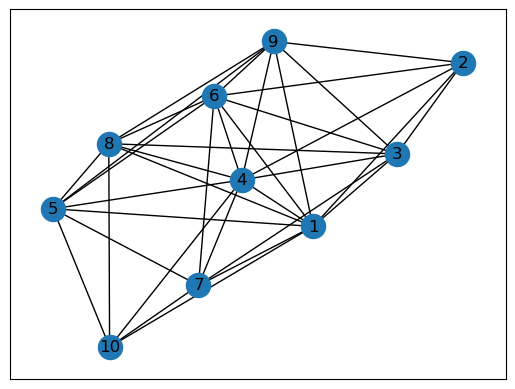

In [10]:
DrawNetwork(h, "graph1.png")

In [11]:
def GraphPartitioning(fileName, k):
    '''
    Partitions a graph into k parts using METIS
    
    Input
    -----
    fileName  : string
                name of the file with the graph
    k         : int
                parts to be madee
    '''
    os.system("gpmetis " + fileName + " " + str(k))

In [12]:
GraphPartitioning("graph.txt", 2)

******************************************************************************
METIS 5.0 Copyright 1998-13, Regents of the University of Minnesota
 (HEAD: , Built on: Nov  5 2021, 13:09:47)
 size of idx_t: 32bits, real_t: 64bits, idx_t *: 64bits

Graph Information -----------------------------------------------------------
 Name: graph.txt, #Vertices: 10, #Edges: 35, #Parts: 2

Options ---------------------------------------------------------------------
 ptype=kway, objtype=cut, ctype=shem, rtype=greedy, iptype=metisrb
 dbglvl=0, ufactor=1.030, no2hop=NO, minconn=NO, contig=NO, nooutput=NO
 seed=-1, niter=10, ncuts=1

Direct k-way Partitioning ---------------------------------------------------
 - Edgecut: 16, communication volume: 10.

 - Balance:
     constraint #0:  1.000 out of 0.200

 - Most overweight partition:
     pid: 0, actual: 5, desired: 5, ratio: 1.00.

 - Subdomain connectivity: max: 1, min: 1, avg: 1.00

 - Each partition is contiguous.

Timing Information ------------

In [13]:
def DrawSolution(network, fileName, figName):
    '''
    Plots the solution of the partition and saves it as a png file
    
    Input
    -----
    network   : networkx graph
                graph to be plotted
    fileName  : string
                name of the file
    figName   : string
                name of the png file
    '''
    
    color_map = []
    
    #Reading file
    with open(fileName) as file:
        
        for line in file:
            i = line.split()
            
            
            if int(i[0]) == 0:
                color_map.append("blue")
            if int(i[0]) == 1:
                color_map.append("green")
    
    #Drawing
    pos = nx.spring_layout(network)
    nx.draw_networkx(network, pos, node_color=color_map)
    plt.savefig(figName)
    plt.show()

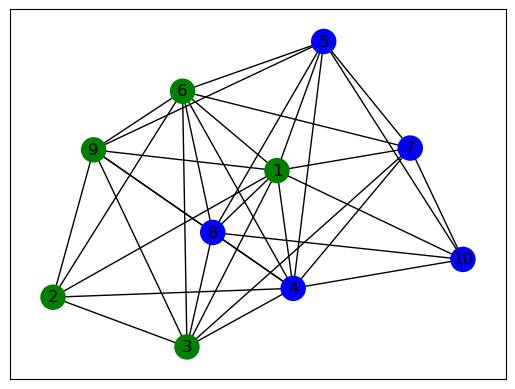

In [14]:
DrawSolution(G, "graph.txt.part.2", "graph.part.plot.png")